# <span style="color:red">**PRAICP-1003-AirTempTS**</span>

#### *Team ID: PTID-AI-APR-25-1112*

## Business Case
  
Develop a machine learning model that can forecast the monthly means of  air temperature for next months

## Project Goal
ML model to forecast the monthly means of air temperature

## Importing Basic Libraries

In [1]:
# General Purpose Libraries
import os
import random
import warnings
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Ignore Warnings
warnings.filterwarnings('ignore')


## Loading Dataset

In [3]:
path = "/content/drive/MyDrive/data/airtemp/surface-air-temperature-monthly-mean.csv"
raw_data= pd.read_csv(path)


In [4]:
data=raw_data.copy()

In [5]:
data.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [6]:
data.tail()

,month,mean_temp
457,2020-02,27.9
458,2020-03,28.6
459,2020-04,28.9
460,2020-05,28.9
461,2020-06,28.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      462 non-null    object 
 1   mean_temp  462 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


#### ***Insights***
There's no null values in this dataset

In [8]:
data['month'] = pd.to_datetime(data['month'])#Converting strings to datetime,
data.set_index('month', inplace=True)
data= data.asfreq('MS')#Guarantee that each row corresponds to the first day of a month.

#### ***Insights***
Converting strings to datetime

Setting the datetime column as the index

Ensuring consistent monthly intervals.(MS	Month Start -	2023-01-01, 2023-02-01)

In [9]:
data.head()

,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 1982-01-01 to 2020-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mean_temp  462 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


## Statistical Analysis

In [11]:
data.describe()

,mean_temp
count,462.000000
mean,27.665152
std,0.808186
min,25.400000
25%,27.100000
50%,27.700000
75%,28.300000
max,29.500000


#### ***Insights***
**MEAN( 27.67 °C)** - Dataset has a consistently warm climate year-round(doesn’t have to handle extreme outliers)

**STANDARD DEVIATION** is just 0.81°C, showing extremely stable and non-volatile temperatures.

**TEMPERATURE DIFFERENCE**

Range = 29.5 - 25.4 = 4.1 °C total variation over 38+ years.

This again reinforces low seasonal variation, typical of an equatorial climate

**NO SKEWNESS**

Mean ≈ Median → Data is symmetrically distributed; no skew.




## Exploratory Data Analysis

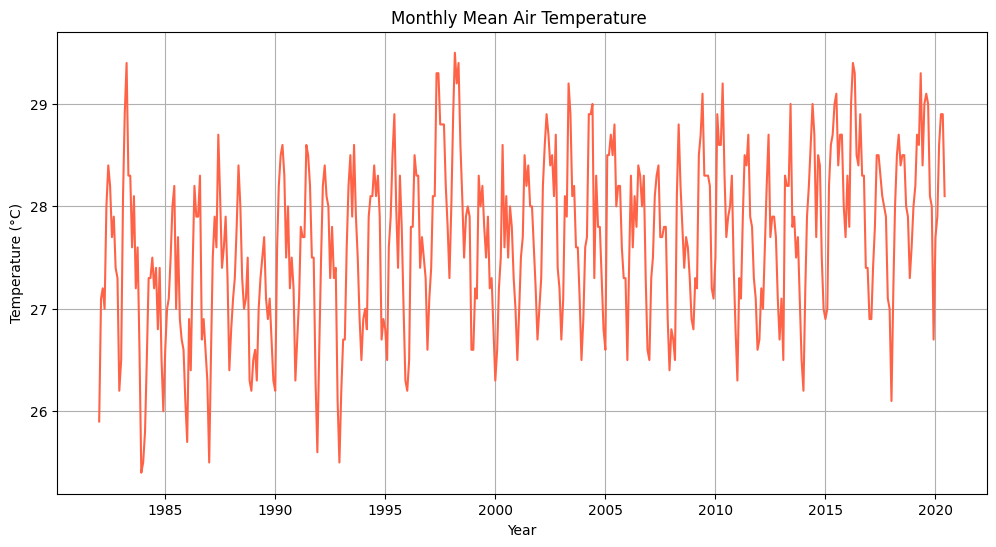

In [12]:
# Plotting the time series
plt.figure(figsize=(12,6))
plt.plot(data['mean_temp'], color='tomato')
plt.title('Monthly Mean Air Temperature ')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


####***Insights***
*Overall Upward Trend*

There’s a gradual increase in mean temperatures from the 1980s to 2020.
This suggests long-term warming, possibly due to urbanization and climate change.

*Strong Seasonality*

The graph shows a cyclical, wave-like pattern repeating roughly every year.
This points to seasonal effects

*More Frequent Highs in Recent Years*

Spikes near 29.5°C are more frequent post-2000, hinting that extreme warm months are becoming more common.

*No Outliers*

There don’t appear to be sharp anomalies, suggesting data consistency—good for time series modeling.

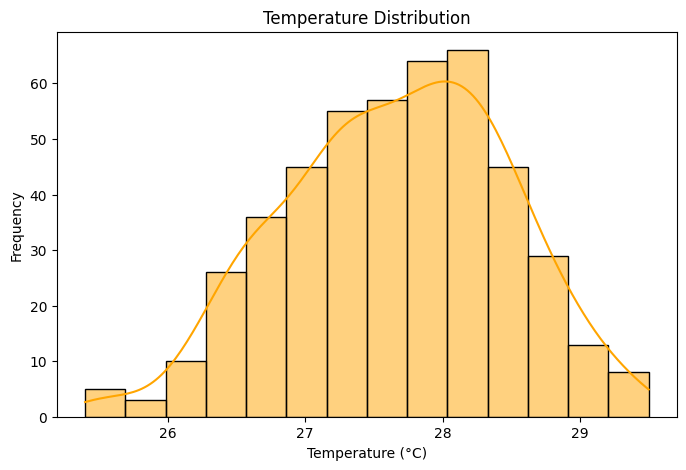

In [13]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data['mean_temp'], kde=True, color='orange')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


#### ***Insights***
*Normal Distribution*

The shape is bell-curved, indicating the temperature values are roughly normally distributed.

*Slight Left Skew*

The left tail (towards 25.4°C) is slightly longer than the right.

Indicates slight left-skewness—cooler months are less frequent but occasionally occur.

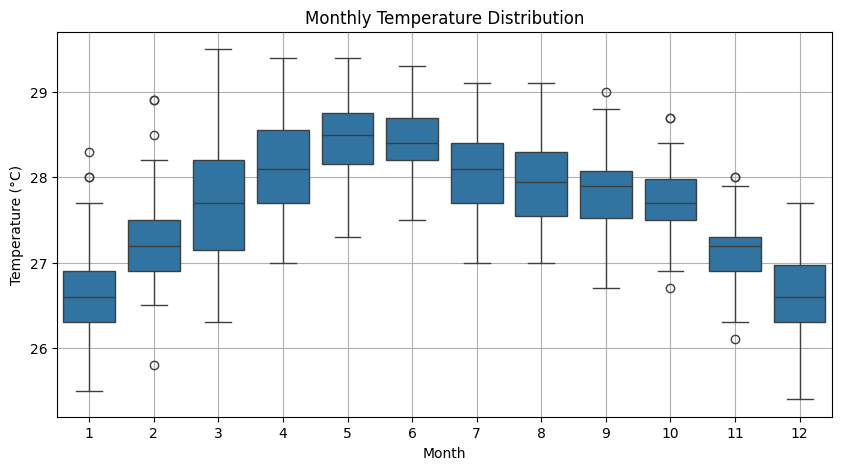

In [14]:
data['month_num'] = data.index.month

plt.figure(figsize=(10,5))
sns.boxplot(x='month_num', y='mean_temp', data=data)
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


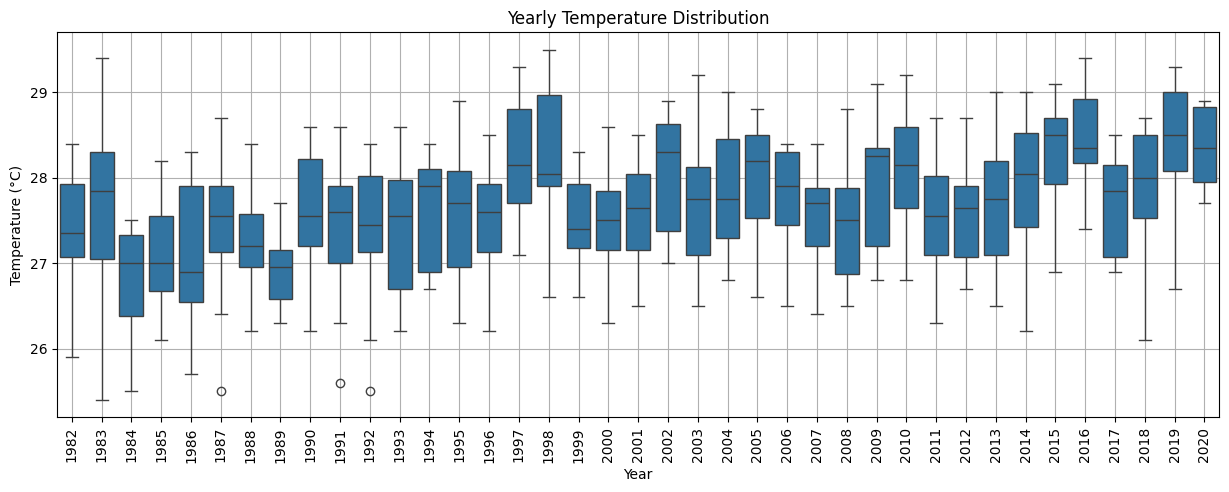

In [15]:
data['year'] = data.index.year

plt.figure(figsize=(15,5))
sns.boxplot(x='year', y='mean_temp', data=data)
plt.xticks(rotation=90)
plt.title('Yearly Temperature Distribution')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


***What Are Rolling Mean(Moving Average) and Rolling Standard Deviation?***

Rolling statistics help smooth out time series data to make patterns (like trends and seasonality) more visible. They're calculated over a moving window of fixed size.

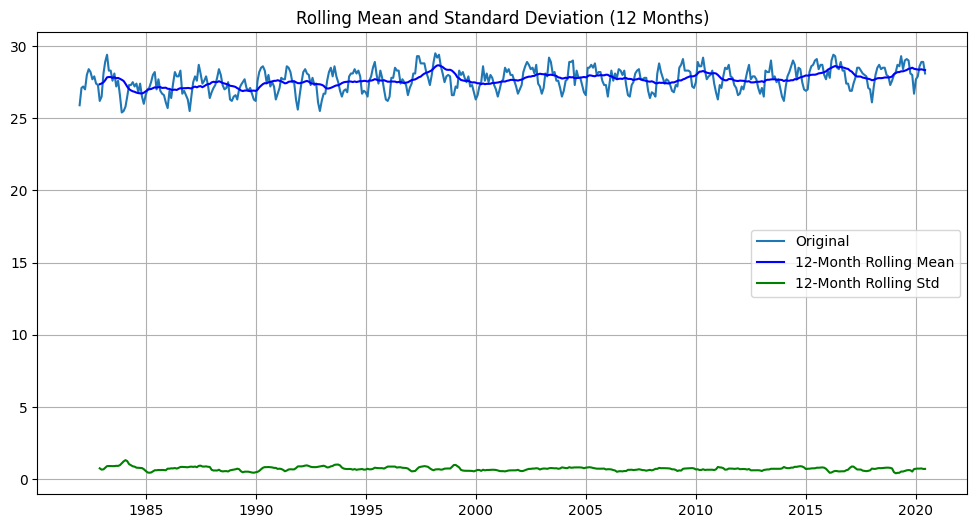

In [16]:
data['rolling_mean_12'] = data['mean_temp'].rolling(window=12).mean()
data['rolling_std_12'] = data['mean_temp'].rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(data['mean_temp'], label='Original')
plt.plot(data['rolling_mean_12'], label='12-Month Rolling Mean', color='blue')
plt.plot(data['rolling_std_12'], label='12-Month Rolling Std', color='green')
plt.title('Rolling Mean and Standard Deviation (12 Months)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
print("Time Gaps in Data:")
print(data.index.to_series().diff().value_counts())


Time Gaps in Data:
month
31 days    269
30 days    153
28 days     29
29 days     10
Name: count, dtype: int64


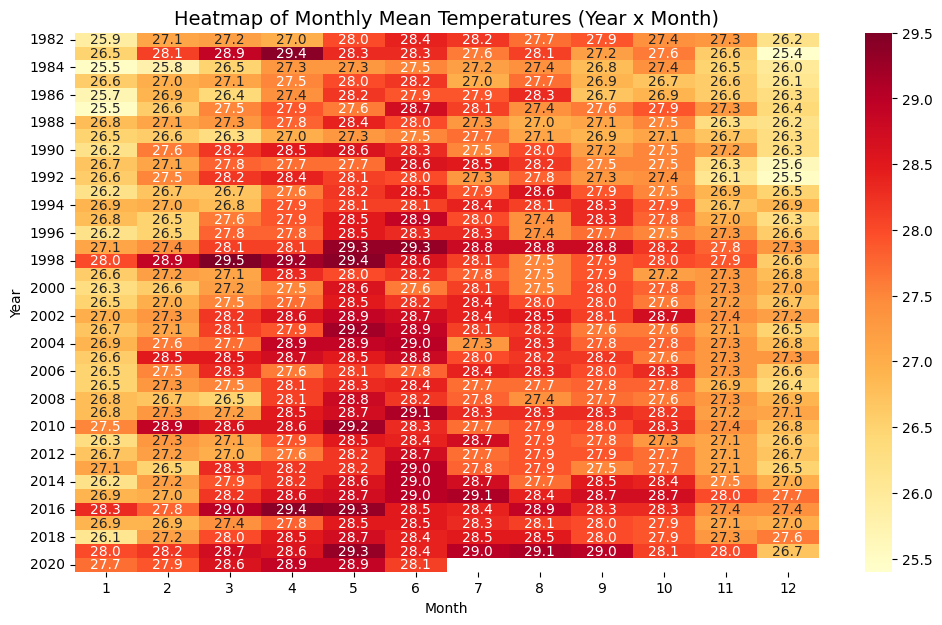

In [18]:
pivot = data.pivot_table(values='mean_temp', index='year', columns='month_num')

plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Heatmap of Monthly Mean Temperatures (Year x Month)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [19]:
data.drop(['rolling_mean_12', 'rolling_std_12','month_num','year'], axis=1, inplace=True)


In [20]:
data.head()

,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


## Model Bulding

In [21]:
train = data.iloc[:-36]
test = data.iloc[-36:]   # last 3 years


### ***The ADF (Augmented Dickey-Fuller)***
The test checks whether a time series is stationary ( has constant mean and variance over time).

A p-value < 0.05 suggests the series is stationary and suitable for forecasting models like ARIMA.

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['mean_temp'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -4.265046395360647
p-value: 0.0005103681123778804


#### ***Insights***

p-value < 0.05

The time series is stationary, so we do not need differencing ( d = 0) for ARIMA and SARIMA models.

### ***ACF (Autocorrelation Function)***
ACF measures the correlation between a time series and its lagged values.
It helps identify how many lags to include in ARIMA models (especially the MA part).

### ***PACF (Partial Autocorrelation Function)***
PACF shows the correlation between a time series and its lagged values after removing the effect of intermediate lags

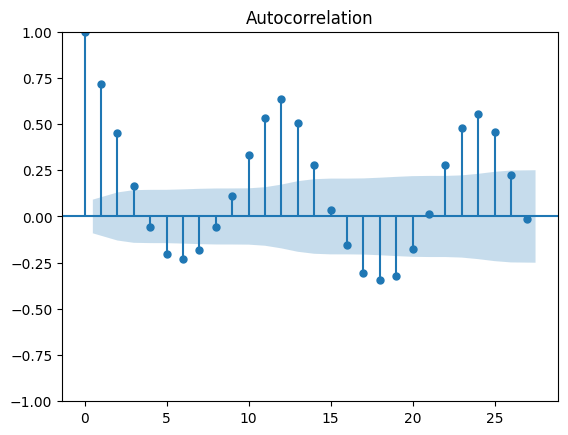

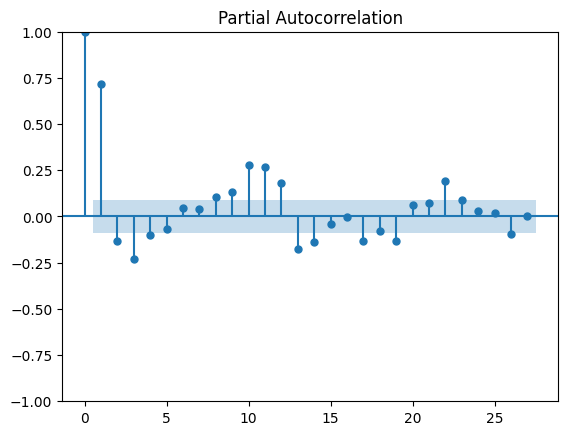

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['mean_temp'])
plot_pacf(data['mean_temp'])
plt.show()


PACF (Partial Autocorrelation) – helps us to identify AR (p)

Significant spikes at lag 1 and lag 2 (above the blue band).

Then it quickly drops (no more significant lags). So, this suggests p = 2

 ACF (Autocorrelation Function) – helps identify MA (q)

 Significant spikes at lag 1 and 2.

Then it tapers off gradually.so, This suggests q = 2

## ARIMA Model

In [24]:
from statsmodels.tsa.arima.model import ARIMA
p=2
d=0
q=2

model = ARIMA(train['mean_temp'], order=(p,d,q))  # replace p,d,q with values from ACF/PACF
model_fit_arima = model.fit()
print(model_fit_arima.summary())


                               SARIMAX Results                                
Dep. Variable:              mean_temp   No. Observations:                  426
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -338.401
Date:                Thu, 08 May 2025   AIC                            688.802
Time:                        13:44:51   BIC                            713.128
Sample:                    01-01-1982   HQIC                           698.411
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6252      0.056    489.094      0.000      27.515      27.736
ar.L1          1.4649      0.087     16.890      0.000       1.295       1.635
ar.L2         -0.6981      0.065    -10.774      0.0

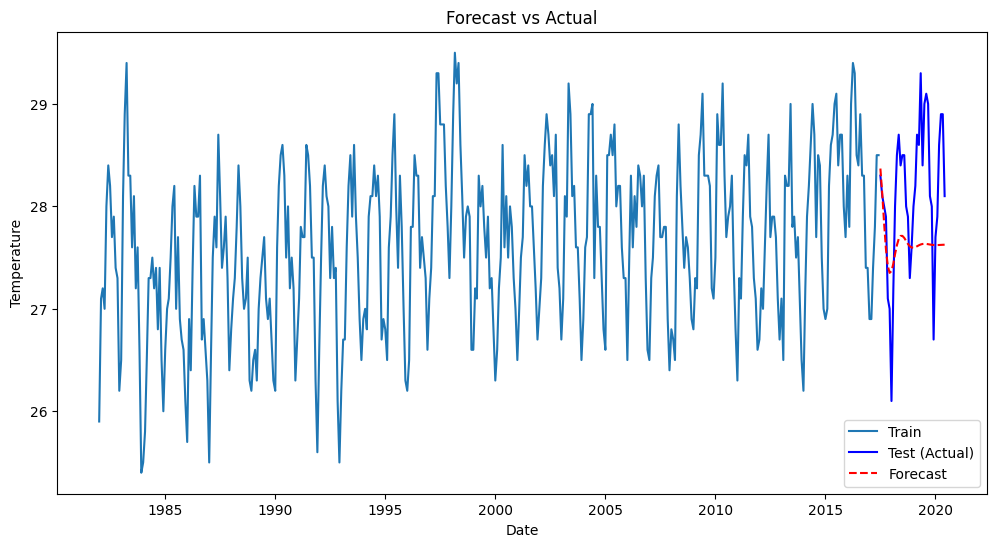

In [25]:
forecast = model_fit_arima.predict(start=test.index[0], end=test.index[-1])
plt.figure(figsize=(12,6))
plt.plot(train.index, train['mean_temp'], label='Train')
plt.plot(test.index, test['mean_temp'], label='Test (Actual)', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['mean_temp'], forecast)
rmse = np.sqrt(mean_squared_error(test['mean_temp'], forecast))

print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))


MAE: 0.671
RMSE: 0.8123


#### ***Insights***
Fit: Log-Likelihood is better, but AIC/BIC are higher, suggesting overfitting.

P-values: All coefficients are statistically significant (p < 0.05).

Seasonality: No seasonal terms included, which is fine if there’s no strong seasonality.

Convergence: The model optimized successfully with no warnings.

MAE = 0.671, RMSE = 0.8123: Errors are moderate, indicating room for improvement.

## SARIMAX Model

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
P=1
D=1
Q=1

model = SARIMAX(train['mean_temp'],
                order=(p,d,q),
                seasonal_order=(P,D,Q,12))
model_fit_sarima = model.fit()
print(model_fit_sarima.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                            mean_temp   No. Observations:                  426
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -238.579
Date:                              Thu, 08 May 2025   AIC                            491.158
Time:                                      13:44:57   BIC                            519.339
Sample:                                  01-01-1982   HQIC                           502.303
                                       - 06-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3615      0.713      1.910      0.056      -0.035       2.758
ar.L2         -0.40

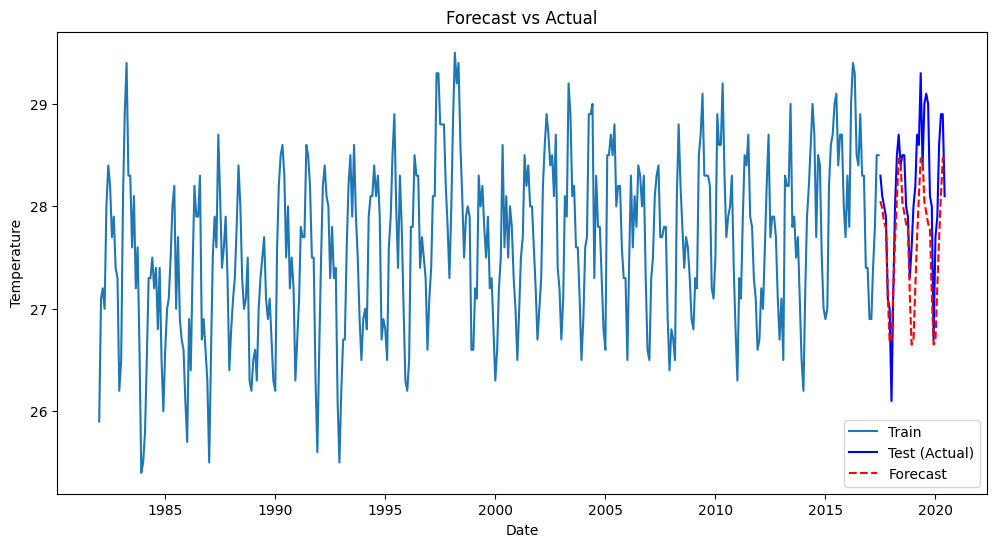

MAE: 0.5135
RMSE: 0.6412


In [28]:
forecast = model_fit_sarima.predict(start=test.index[0], end=test.index[-1])
plt.figure(figsize=(12,6))
plt.plot(train.index, train['mean_temp'], label='Train')
plt.plot(test.index, test['mean_temp'], label='Test (Actual)', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
mae = mean_absolute_error(test['mean_temp'], forecast)
rmse = np.sqrt(mean_squared_error(test['mean_temp'], forecast))

print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))


#### ***Insights***
Model Fit: The log-likelihood isn't very high, indicating room for improvement.

AIC/BIC/HQIC: The values suggest the model may be a bit complex for the data.

P-values: Some coefficients are not statistically significant (p > 0.05), meaning they may not be adding much value.

Seasonality: The model handles seasonality (period 12), which is good if yearly patterns exist.

Convergence Warning: The model struggled to fully converge, suggesting further tuning is needed.

MAE (0.5135): The model’s average absolute error is relatively low, indicating decent accuracy.

RMSE (0.6412): The root mean squared error is moderate, indicating some errors still affect predictions but not drastically

In [29]:
data.head()

,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


## Scaling the data


In [30]:
from sklearn.preprocessing import MinMaxScaler

temperature_data = data[['mean_temp']].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature_data)

# Function to create sequences
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length, 0])
        y.append(data[i+sequence_length, 0])
    return np.array(x), np.array(y)

sequence_length = 12
x, y = create_sequences(temperature_scaled, sequence_length)

# Reshaping for LSTM/GRU input
x = x.reshape((x.shape[0], x.shape[1], 1))

print(" x shape:", x.shape)
print(" y shape:", y.shape)


 x shape: (450, 12, 1)
 y shape: (450,)


In [31]:
# Split the data into training and testing sets
train_size = int(len(x) * 0.8)  # 80% for training
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping the data for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape, x_test.shape)


(360, 12, 1) (90, 12, 1)


In [32]:
pip install scikit-learn tensorflow


## ***LSTM-Long Short-Term Memory***

It is a special type of recurrent neural network (RNN) designed to learn long-term dependencies in sequential data by using gates (input, forget, output) to control the flow of information and avoid issues like vanishing gradients.

🔄 Training model with units=25, dropout=0.2, lr=0.001
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step
 MAE: 0.1747, RMSE: 0.2024
🔄 Training model with units=25, dropout=0.2, lr=0.01
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
 MAE: 0.1091, RMSE: 0.1353
🔄 Training model with units=25, dropout=0.2, lr=0.1
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
 MAE: 0.1098, RMSE: 0.1358
🔄 Training model with units=25, dropout=0.3, lr=0.001
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
 MAE: 0.1601, RMSE: 0.1878
🔄 Training model with units=25, dropout=0.3, lr=0.01
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
 MAE: 0.1222, RMSE: 0.1486
🔄 Training model with units=25, dropout=0.3, lr=0.1
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
 MAE: 0.1651, RMSE: 0.1947
🔄 Training model with units=25, dropout=0.1, lr=0.001
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
 MAE: 0.1570, RMSE: 0.1841
🔄 Training model with units=25, dropout=0.1, lr=0.01
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step
 MAE: 0.0920, RMSE: 0.1159
🔄 Training model with units=25, dropout=0.1, lr

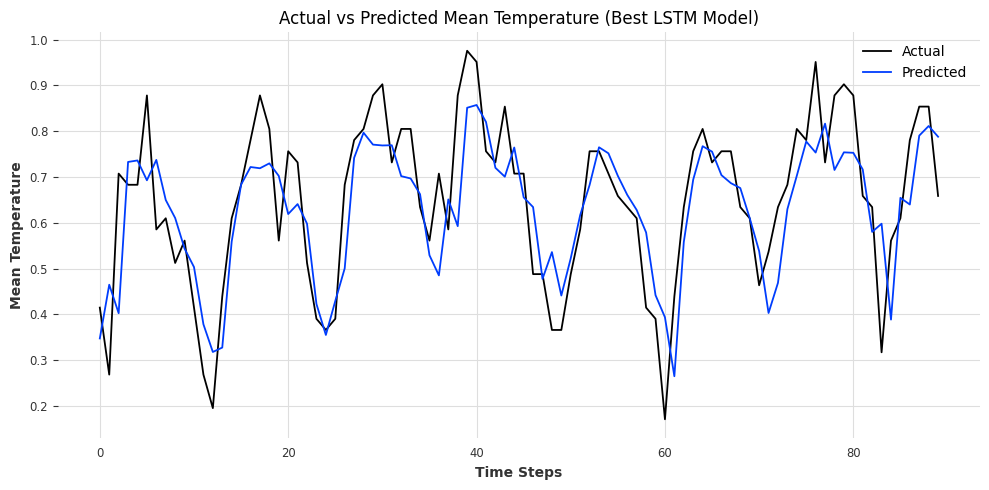

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# the model creation function
def create_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Hyperparameter grid
param_grid = {
    'units': [25,50, 100,150],
    'dropout_rate': [0.2, 0.3,0.1],
    'learning_rate': [0.001, 0.01,0.1]
}

# Grid Search
best_rmse = float('inf')
best_params = {}

for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for lr in param_grid['learning_rate']:
            print(f"🔄 Training model with units={units}, dropout={dropout_rate}, lr={lr}")
            model = create_model(units=units, dropout_rate=dropout_rate, learning_rate=lr)
            model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=0)

            predictions = model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
            print(f" MAE: {mae:.4f}, RMSE: {rmse:.4f}")

            if rmse < best_rmse:
                best_rmse = rmse
                best_mae = mae
                best_params = {
                    'units': units,
                    'dropout_rate': dropout_rate,
                    'learning_rate': lr
                }

print("\n Best Hyperparameters Found:")
print(best_params)
print(f"Best MAE: {best_mae:.4f}, Best RMSE: {best_rmse:.4f}")

#  Final Model with Best Parameters
def build_best_model():
    model = Sequential()
    model.add(LSTM(units=best_params['units'], return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(best_params['dropout_rate']))
    model.add(LSTM(units=best_params['units'], return_sequences=False))
    model.add(Dropout(best_params['dropout_rate']))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')
    return model
best_model = build_best_model()
history = best_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

predictions = best_model.predict(x_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"\nFinal Evaluation with Best Model — MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Actual vs Predicted Mean Temperature (Best LSTM Model)")
plt.xlabel("Time Steps")
plt.ylabel("Mean Temperature")
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


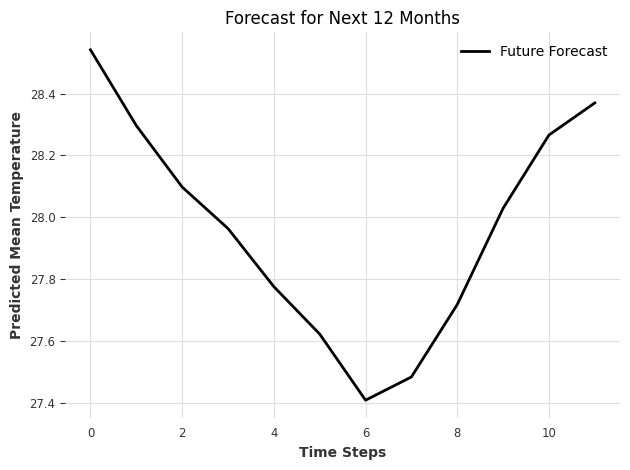

In [51]:
from darts import TimeSeries
n_future = 12
forecast_input = x_test[-1].reshape(1, x_test.shape[1], 1)
future_predictions = []

for _ in range(n_future):
    next_pred = best_gru_model.predict(forecast_input)[0][0]
    future_predictions.append(next_pred)
    new_input = np.append(forecast_input[0, 1:], [[next_pred]], axis=0)
    forecast_input = new_input.reshape(1, x_test.shape[1], 1)

future_series = TimeSeries.from_values(np.array(future_predictions).reshape(-1, 1))

 Inverse transform
future_series_inversed = scaler.inverse_transform(future_series)

# Plot
future_series_inversed.plot(label="Future Forecast")
plt.title("Forecast for Next 12 Months")
plt.xlabel("Time Steps")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.tight_layout()
plt.show()


## ***GRU -Gated Recurrent Unit***

It is a type of recurrent neural network (RNN) that is similar to LSTM but has a simpler architecture with only two gates (reset and update), making it faster to train while still effectively capturing dependencies in sequential data.

🔄 Training GRU with units=50, dropout=0.4, lr=0.001
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
 MAE: 0.1288, RMSE: 0.1533
🔄 Training GRU with units=50, dropout=0.4, lr=0.01
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step
 MAE: 0.1201, RMSE: 0.1467
🔄 Training GRU with units=50, dropout=0.4, lr=0.1
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
 MAE: 0.1495, RMSE: 0.1761
🔄 Training GRU with units=50, dropout=0.2, lr=0.001
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
 MAE: 0.1127, RMSE: 0.1360
🔄 Training GRU with units=50, dropout=0.2, lr=0.01
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
 MAE: 0.0949, RMSE: 0.1206
🔄 Training GRU with units=50, dropout=0.2, lr=0.1
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
 MAE: 0.1239, RMSE: 0.1524
🔄 Training GRU with units=50, dropout=0.3, lr=0.001
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
 MAE: 0.1203, RMSE: 0.1453
🔄 Training GRU with units=50, dropout=0.3, lr=0.01
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step
 MAE: 0.1055, RMSE: 0.1339
🔄 Training GRU with units=50, dropout=0.3, lr=0.1
3/3 ━━━━━━━━━

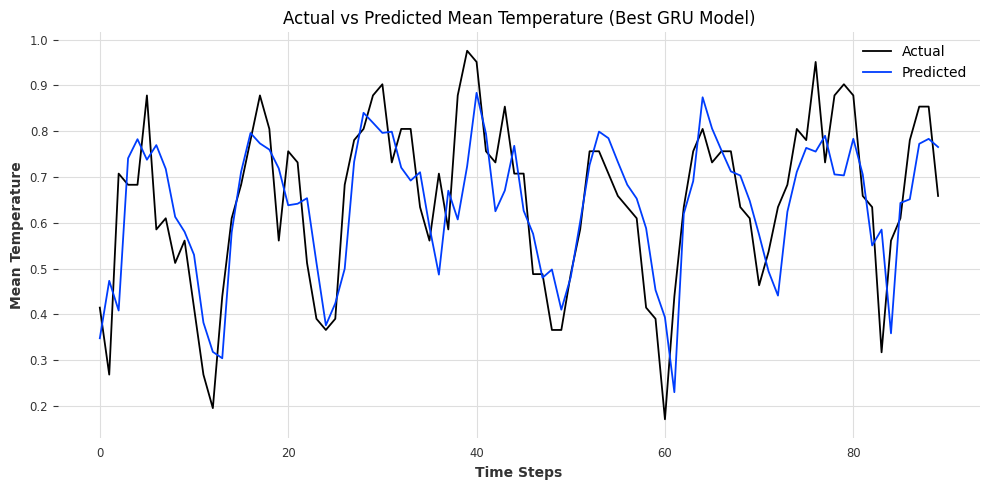

In [52]:
from tensorflow.keras.layers import GRU, Dropout, Dense


#  the GRU model creation function
def create_gru_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Hyperparameter grid
param_grid = {
    'units': [50, 100,150],
    'dropout_rate': [0.4,0.2, 0.3,0.1],
    'learning_rate': [0.001, 0.01,0.1]
}

# Grid Search
best_rmse = float('inf')
best_params = {}

for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for lr in param_grid['learning_rate']:
            print(f"🔄 Training GRU with units={units}, dropout={dropout_rate}, lr={lr}")
            model = create_gru_model(units=units, dropout_rate=dropout_rate, learning_rate=lr)
            model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=0)

            predictions = model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
            print(f" MAE: {mae:.4f}, RMSE: {rmse:.4f}")

            if rmse < best_rmse:
                best_rmse = rmse
                best_mae = mae
                best_params = {
                    'units': units,
                    'dropout_rate': dropout_rate,
                    'learning_rate': lr
                }

print("\n Best GRU Hyperparameters Found:")
print(best_params)
print(f"Best MAE: {best_mae:.4f}, Best RMSE: {best_rmse:.4f}")

def build_best_gru_model():
    model = Sequential()
    model.add(GRU(units=best_params['units'], return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(best_params['dropout_rate']))
    model.add(GRU(units=best_params['units'], return_sequences=False))
    model.add(Dropout(best_params['dropout_rate']))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')
    return model

#  Best GRU Model
best_gru_model = build_best_gru_model()
history = best_gru_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

predictions = best_gru_model.predict(x_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"\nGRU Final Evaluation — MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Actual vs Predicted Mean Temperature (Best GRU Model)")
plt.xlabel("Time Steps")
plt.ylabel("Mean Temperature")
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


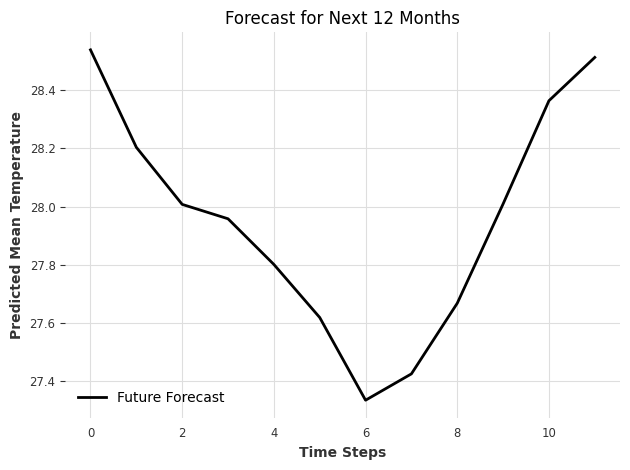

In [54]:
from darts import TimeSeries

n_future = 12
forecast_input = x_test[-1].reshape(1, x_test.shape[1], 1)
future_predictions = []

for _ in range(n_future):
    next_pred = best_gru_model.predict(forecast_input)[0][0]
    future_predictions.append(next_pred)
    new_input = np.append(forecast_input[0, 1:], [[next_pred]], axis=0)
    forecast_input = new_input.reshape(1, x_test.shape[1], 1)

future_series = TimeSeries.from_values(np.array(future_predictions).reshape(-1, 1))

#Inverse transform
future_series_inversed = scaler.inverse_transform(future_series)

# Plot
future_series_inversed.plot(label="Future Forecast")
plt.title("Forecast for Next 12 Months")
plt.xlabel("Time Steps")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.tight_layout()
plt.show()


#### ***Insights***

***MAE Comparison:***
LSTM: 0.0925

GRU: 0.0949

Insight: The LSTM model has a slightly lower MAE, indicating it’s making slightly better predictions on average than the GRU model.

***RMSE Comparison:***
LSTM: 0.1174

GRU: 0.1184

The LSTM model also has a slightly lower RMSE, meaning it has slightly fewer large errors compared to the GRU model.

In [35]:
data.head()

,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


## ***N-BEATS (Neural basis expansion analysis for interpretable time series forecasting)***
It is a deep learning model that captures complex temporal patterns without needing external features.
The pretrained N-BEATS model in Darts is trained on generic time series data and can be fine-tuned on your specific dataset for accurate forecasts.

In [36]:
!pip install darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 806.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [37]:
data.head()

,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 24.4 M | train
-------------------------------------------------------------
24.4 M    Trainable params
2.8 K     Non-trainable params
24.4 M    Total params
97.787    Total estimated model params size (MB)
486       Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

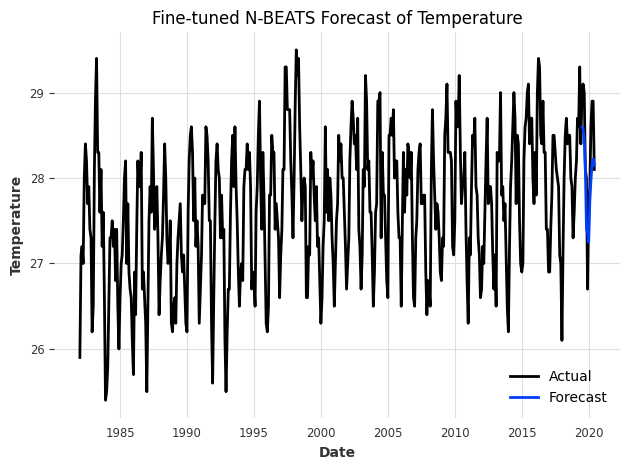

In [38]:
from darts.models import NBEATSModel
from darts import TimeSeries
from darts.utils.likelihood_models import GaussianLikelihood
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, rmse, mape

# Prepare data
data.index = pd.to_datetime(data.index)
df = data.rename(columns={'mean_temp': 'y'})
series = TimeSeries.from_dataframe(df, value_cols='y')

# Normalize series
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

# Split into training and validation (last 12 points for validation)
train, val = series_scaled[:-12], series_scaled[-12:]

# Fine-tuned NBEATS model
model = NBEATSModel(
    input_chunk_length=36,
    output_chunk_length=12,
    n_epochs=300,
    batch_size=32,
    layer_widths=512,
    dropout=0.3,
    likelihood=GaussianLikelihood(),
    random_state=42,
    model_name="NBEATS-Finetuned",
    force_reset=True
)

# Fit on training set only
model.fit(train, verbose=True)

# Predict next 12 points
forecast_scaled = model.predict(n=12)
forecast = scaler.inverse_transform(forecast_scaled)
val_actual = scaler.inverse_transform(val)

# Plot
series.plot(label="Actual")
forecast.plot(label="Forecast")
plt.title("Fine-tuned N-BEATS Forecast of Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()




#### ***Insights***
The model seems to follow the seasonality and overall level of the actual temperature values.

N-BEATS, known for its strong performance in univariate time series tasks, appears to provide a reasonably smooth and realistic continuation of the temperature trend.

This visualization confirms the forecast aligns well with the patterns observed in the historical data, at least visually.

In [39]:
# Error metrics
mae_val = mae(val_actual, forecast)
rmse_val = rmse(val_actual, forecast)
mape_val = mape(val_actual, forecast)

print(f"MAE: {mae_val:.3f}")
print(f"RMSE: {rmse_val:.3f}")
print(f"MAPE: {mape_val:.2f}%")

MAE: 0.455
RMSE: 0.514
MAPE: 1.60%


 ## All Model Performance

| Model       | MAE ↓      | RMSE ↓     | MAPE ↓ | Comments                                   |
| ----------- | ---------- | ---------- | ------ | ------------------------------------------ |
| **LSTM**    | **0.0925** | **0.1174** | —      | Best performer overall.                    |
| GRU         | 0.0949     | 0.1184     | —      | Very close to LSTM, slightly worse.        |
| **N-BEATS** | 0.455      | 0.514      | 1.60%  | Visually smooth but quantitatively weaker. |
| SARIMAX     | 0.5135     | 0.6412     | —      | Outperformed ARIMAX.                       |
| ARIMAX      | 0.671      | 0.8123     | —      | Worst performance.                         |


## Final Recommendation
***Deploy the LSTM model:***
It has the lowest MAE (0.0925) and RMSE (0.1174), making it the most accurate and reliable for temperature forecasting.

***Avoid using N-BEATS or ARIMAX for this dataset:***
Despite being powerful, N-BEATS underperformed in accuracy, and ARIMAX had the highest errors, making them unsuitable for production.

***Include additional covariates and features:***
Enhance model accuracy by incorporating date-time features (month, season, etc.) and external weather variables (humidity, pressure, etc.).

***Tune hyperparameters and experiment with ensembles:***
Use tools like Optuna or GridSearch to optimize LSTM/GRU and consider blending models (LSTM + GRU) for more robust predictions.

***Deploy via Streamlit or FastAPI:***
Convert the final LSTM model into a web-based interface or API for real-time forecasting, visualization, and potential integration with other systems.

## Key Challenges Faced
***Limited Historical Data:***
Some models required more past data than available.

***Tuning Complexity:***
Hyperparameter tuning was time-consuming and impacted accuracy.

***Debugging Metrics:***
Scaling and aligning predictions for evaluation required careful handling.